# Import Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io

# Operasi-operasi Dasar

Operasi-operasi pada pengolahan citra dapat dibagi menjadi 4 level (aras), yaitu:
- Aras Titik
- Aras Lokal
- Aras Global
- Aras Objek

## Aras Titik

Operasi ini hanya melibatkan satu piksel / piksel tunggal pada citra.

$$ f_{baru}(x, y) = O_{titik}(f(x, y)) $$

Contoh:
- Operasi pengambangan (thresholding)
- Operasi citra negatif
- Operasi penceharan (brigthening)
- Operasi konversi citra berwarna (RGB) ke citra abu-bau (Grayscale)

### Operasi Pengambangan (Thresholding)

Mengubah nilai piksel pada rentang nilai tertentu, seperti citra abu-abu ke biner.

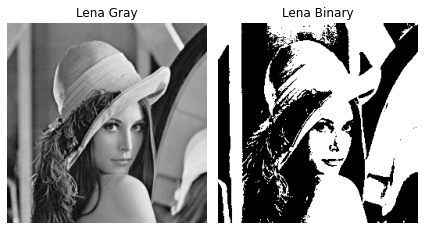

In [2]:
# Create thresholding function
def threshold_operation(image, threshold):
    """
        Convert Gray Image to Binary Image
    """

    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            if image_copy[row, column] < threshold:
                image_copy[row, column] = 0
            else:
                image_copy[row, column] = 1
                
    return image_copy

# Load image
lena_gray = io.imread("../test_images/lena_gray.bmp")
lena_binary = threshold_operation(lena_gray, 128)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True)

# Show image
ax[0].imshow(lena_gray, cmap=plt.cm.gray)
ax[0].set_title("Lena Gray")
ax[0].axis("off")

ax[1].imshow(lena_binary, cmap=plt.cm.gray)
ax[1].set_title("Lena Binary")
ax[1].axis("off");

### Operasi Citra Negatif (Negative Image)

Mengubah citra abu-abu menjadi citra negative, seperti film negatif pada fotografi.

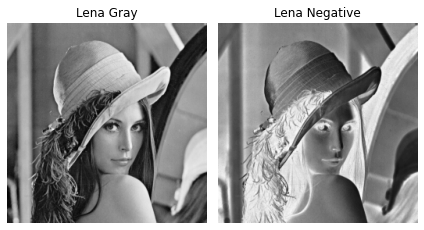

In [3]:
def negative_operation(image):
    """
        Convert Gray Image to Negative Image
    """
    
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
                image_copy[row, column] = 255 - image_copy[row, column]
                
    return image_copy

# Load image
lena_gray = io.imread("../test_images/lena_gray.bmp")
lena_negative = negative_operation(lena_gray)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True)

# Show image
ax[0].imshow(lena_gray, cmap=plt.cm.gray)
ax[0].set_title("Lena Gray")
ax[0].axis("off")

ax[1].imshow(lena_negative, cmap=plt.cm.gray)
ax[1].set_title("Lena Negative")
ax[1].axis("off");

### Operasi Pencerahan Citra (Image Brightening)

Operasi ini meningkatkan atau mengurangi kecerahan dari sebuah citra, dengan cara menambahkan atau mengurangi sebuah konstanta ke setiap piksel citra.

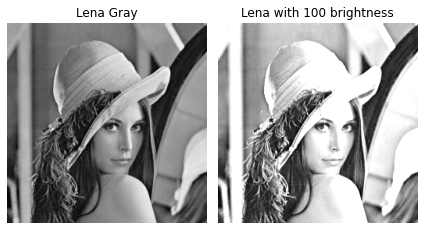

In [4]:
def brigthening_operation(image, brightness):
    """
        Up or down brightening of gray Image
    """
    
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            temp = image_copy[row, column] + brightness
            
            if temp < 0:
                image_copy[row, column] = 0
            elif temp > 255:
                image_copy[row, column] = 255
            else:
                image_copy[row, column] = temp
                
    return image_copy

# Load image
lena_gray = io.imread("../test_images/lena_gray.bmp")
brightness = 100
lena_100b = brigthening_operation(lena_gray, brightness)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True)

# Show image
ax[0].imshow(lena_gray, cmap=plt.cm.gray)
ax[0].set_title("Lena Gray")
ax[0].axis("off")

ax[1].imshow(lena_100b, cmap=plt.cm.gray)
ax[1].set_title(f"Lena with {brightness} brightness")
ax[1].axis("off");

### Berwarna (RGB) ke Abu-abu (Grayscale)

Proses mengubah citra berwarna menjadi citra abu-abu.

Ada dua cara:
- Cara sederhana, tetapi hasilnya kurang bagus, $Y = (R + G + B) / 3$ 
- Untuk hasil yang lebih bagus, $Y = 0.299R + 0.587G + 0.144B$

C:\Users\62821\AppData\Local\Temp\ipykernel_9988\157865514.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  gray_image[row, column] = np.uint8((red_channel[row, column] + green_channel[row, column] + blue_channel[row, column]) / 3)


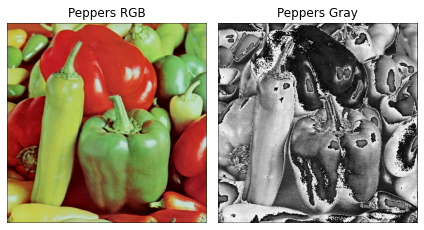

In [5]:
def rgb2gray_operation_1(rgb_image):
    """
        RGB to Grayscale with (R+G+B) / 3 formula
    """
    
    image_copy = rgb_image.copy()
    red_channel = image_copy[:, :, 0]
    green_channel = image_copy[:, :, 1]
    blue_channel = image_copy[:, :, 2]
    gray_image = np.zeros((image_copy.shape[0], image_copy.shape[1]), dtype=np.uint8)
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            gray_image[row, column] = np.uint8((red_channel[row, column] + green_channel[row, column] + blue_channel[row, column]) / 3)
                
    return gray_image

# Load image
peppers_rgb = io.imread("../test_images/peppers_rgb.bmp")
peppers_gray = rgb2gray_operation_1(peppers_rgb)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True)

# Show image
ax[0].imshow(peppers_rgb)
ax[0].set_title("Peppers RGB")
ax[0].axis("off")

ax[1].imshow(peppers_gray, cmap=plt.cm.gray)
ax[1].set_title(f"Peppers Gray")
ax[1].axis("off");

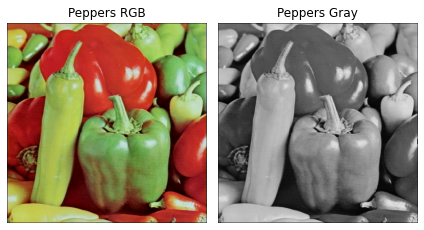

In [6]:
def rgb2gray_operation_2(rgb_image):
    """
        RGB to Grayscale with (0.299 * R) + (0.587 * G) + (0.144 * B) formula
    """
    
    image_copy = rgb_image.copy()
    red_channel = image_copy[:, :, 0]
    green_channel = image_copy[:, :, 1]
    blue_channel = image_copy[:, :, 2]
    gray_image = np.zeros((image_copy.shape[0], image_copy.shape[1]), dtype=np.uint8)
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            gray_image[row, column] = np.uint8((red_channel[row, column] * 0.299) + (green_channel[row, column] * 0.587) + (blue_channel[row, column] * 0.144))
                
    return gray_image

# Load image
peppers_rgb = io.imread("../test_images/peppers_rgb.bmp")
peppers_gray = rgb2gray_operation_2(peppers_rgb)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True)

# Show image
ax[0].imshow(peppers_rgb)
ax[0].set_title("Peppers RGB")
ax[0].axis("off")

ax[1].imshow(peppers_gray, cmap=plt.cm.gray)
ax[1].set_title(f"Peppers Gray")
ax[1].axis("off");

## Aras Lokal

## Aras Global

## Aras Objek

## Operasi Aritmatika

Karena citra merupakan sekumpulan nilai yang di muat dalam sebuah matriks, maka sebuah citra dapat dikenakan operasi penjumlahan, pengurangan, perkalian, dan pembagian.

### Penjumlahan (Menggabungakan Dua Buah Citra)

C:\Users\62821\AppData\Local\Temp\ipykernel_9988\1246603146.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  temp = image_copy_1[row, column] + image_copy_2[row, column]


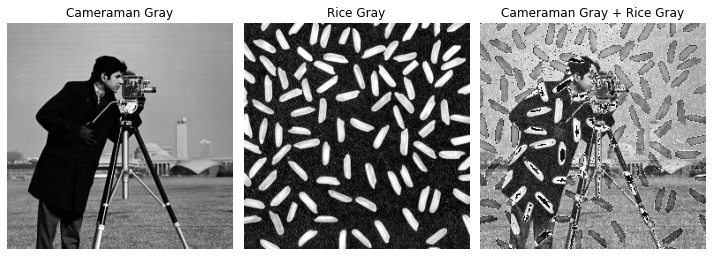

In [7]:
def add_image(image_1, image_2):
    if image_1.ndim != image_2.ndim:
        raise ValueError(f"Dimensi citra image_1 ({image_1.ndim}) dan image_2 ({image_2.ndim}) tidak sama.")
        
    image_copy_1 = image_1.copy()
    image_copy_2 = image_2.copy()
    image_combination = np.zeros((image_copy_1.shape[0], image_copy_2.shape[1]), dtype=np.uint8)
    
    for row in range(image_copy_1.shape[0]):
        for column in range(image_copy_1.shape[1]):
            temp = image_copy_1[row, column] + image_copy_2[row, column]
            
            if temp > 255:
                image_combination[row, column] = 255
            else:
                image_combination[row, column] = temp
                
    return image_combination

cameraman = io.imread("../test_images/camera_gray.bmp")
rice = io.imread("../test_images/rice.png")
cameraman_combine_rice = add_image(cameraman, rice)

fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(10, 10))

ax[0].imshow(cameraman, cmap=plt.cm.gray)
ax[0].set_title("Cameraman Gray")
ax[0].axis("off")

ax[1].imshow(rice, cmap=plt.cm.gray)
ax[1].set_title("Rice Gray")
ax[1].axis("off")

ax[2].imshow(cameraman_combine_rice, cmap=plt.cm.gray)
ax[2].set_title("Cameraman Gray + Rice Gray")
ax[2].axis("off");

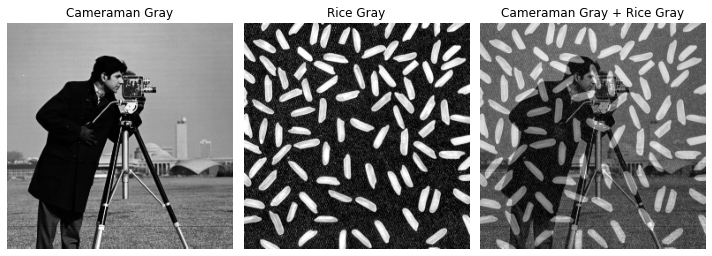

In [8]:
def add_image_weigted(image_1, image_2, alpha=0.5):
    if image_1.ndim != image_2.ndim:
        raise ValueError(f"Dimensi citra image_1 ({image_1.ndim}) dan image_2 ({image_2.ndim}) tidak sama.")
        
    image_copy_1 = image_1.copy()
    image_copy_2 = image_2.copy()
    image_combination = np.zeros((image_copy_1.shape[0], image_copy_2.shape[1]), dtype=np.uint8)
    
    for row in range(image_copy_1.shape[0]):
        for column in range(image_copy_1.shape[1]):
            temp = (alpha * image_copy_1[row, column]) + ((1 - alpha) * image_copy_2[row, column])
            
            if temp > 255:
                image_combination[row, column] = 255
            else:
                image_combination[row, column] = temp
                
    return image_combination

cameraman = io.imread("../test_images/camera_gray.bmp")
rice = io.imread("../test_images/rice.png")
cameraman_combine_rice = add_image_weigted(cameraman, rice)

fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(10, 10))

ax[0].imshow(cameraman, cmap=plt.cm.gray)
ax[0].set_title("Cameraman Gray")
ax[0].axis("off")

ax[1].imshow(rice, cmap=plt.cm.gray)
ax[1].set_title("Rice Gray")
ax[1].axis("off")

ax[2].imshow(cameraman_combine_rice, cmap=plt.cm.gray)
ax[2].set_title("Cameraman Gray + Rice Gray")
ax[2].axis("off");

### Pengurangan (Mencari Perbedaan dari Dua Buah Citra)

C:\Users\62821\AppData\Local\Temp\ipykernel_9988\2267242550.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  red_channel = np.abs(red_channel_image_1[row, column] - red_channel_image_2[row, column])
C:\Users\62821\AppData\Local\Temp\ipykernel_9988\2267242550.py:20: RuntimeWarning: overflow encountered in ubyte_scalars
  green_channel = np.abs(green_channel_image_1[row, column] - green_channel_image_2[row, column])
C:\Users\62821\AppData\Local\Temp\ipykernel_9988\2267242550.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  blue_channel = np.abs(blue_channel_image_1[row, column] - blue_channel_image_2[row, column])


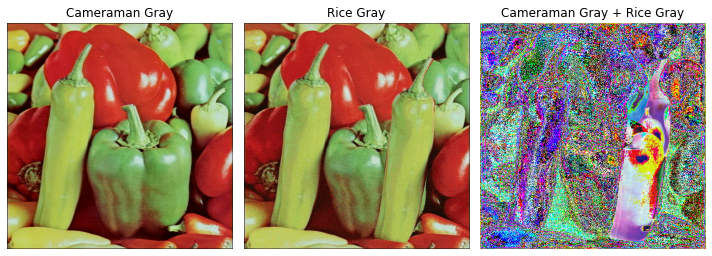

In [9]:
def subtract_image(image_1, image_2):
    if image_1.ndim != image_2.ndim:
        raise ValueError(f"Dimensi citra image_1 ({image_1.ndim}) dan image_2 ({image_2.ndim}) tidak sama.")
        
    image_copy_1 = image_1.copy()
    red_channel_image_1 = image_copy_1[:, :, 0]
    green_channel_image_1 = image_copy_1[:, :, 1]
    blue_channel_image_1 = image_copy_1[:, :, 2]
    
    image_copy_2 = image_2.copy()
    red_channel_image_2 = image_copy_2[:, :, 0]
    green_channel_image_2 = image_copy_2[:, :, 1]
    blue_channel_image_2 = image_copy_2[:, :, 2]
    
    image_combination = np.zeros((image_copy_1.shape[0], image_copy_2.shape[1], 3), dtype=np.uint8)
    
    for row in range(image_copy_1.shape[0]):
        for column in range(image_copy_1.shape[1]):
            red_channel = np.abs(red_channel_image_1[row, column] - red_channel_image_2[row, column])
            green_channel = np.abs(green_channel_image_1[row, column] - green_channel_image_2[row, column])
            blue_channel = np.abs(blue_channel_image_1[row, column] - blue_channel_image_2[row, column])
            
            if red_channel < 0 or green_channel < 0 or blue_channel < 0:
                image_combination[row, column, 0] = 0
                image_combination[row, column, 1] = 0
                image_combination[row, column, 2] = 0
            else:
                image_combination[row, column, 0] = red_channel
                image_combination[row, column, 1] = green_channel
                image_combination[row, column, 2] = blue_channel
                
    return image_combination

peppers_1 = io.imread("../test_images/peppers_rgb.bmp")
peppers_2 = io.imread("../test_images/2_peppers.png")
diff_peppers = subtract_image(peppers_1, peppers_2)

fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(10, 10))

ax[0].imshow(peppers_1, cmap=plt.cm.gray)
ax[0].set_title("Cameraman Gray")
ax[0].axis("off")

ax[1].imshow(peppers_2, cmap=plt.cm.gray)
ax[1].set_title("Rice Gray")
ax[1].axis("off")

ax[2].imshow(diff_peppers)
ax[2].set_title("Cameraman Gray + Rice Gray")
ax[2].axis("off");

### Perkalian (Kalibrasi Kecerahan dari Citra)

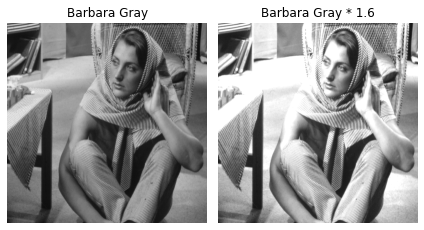

In [10]:
def multiply_image(image, constant_value):
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):            
            if (image_copy[row, column] * constant_value) > 255:
                image_copy[row, column] = 255
            else:
                image_copy[row, column] = image_copy[row, column] * constant_value
        
    return image_copy

# Load image
barbara_gray = io.imread("../test_images/barbara_gray.bmp")
constant_value = 1.6
barbara_gray_plus_100b = multiply_image(barbara_gray, constant_value)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True)

# Show image
ax[0].imshow(barbara_gray, cmap=plt.cm.gray)
ax[0].set_title("Barbara Gray")
ax[0].axis("off")

ax[1].imshow(barbara_gray_plus_100b, cmap=plt.cm.gray)
ax[1].set_title(f"Barbara Gray * {constant_value}")
ax[1].axis("off");

### Pembagian (Normalisasi Kecerahan dari Citra)

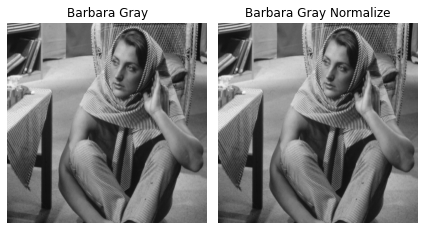

In [11]:
def divide_image(image):
    image_copy = image.copy()
    
    temp = np.zeros((image_copy.shape[0], image_copy.shape[1]), dtype=np.float64)
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):            
             temp[row, column] = image_copy[row, column] / image_copy.max()
        
    return temp

# Load image
barbara_gray = io.imread("../test_images/barbara_gray.bmp")
barbara_gray_normalize = divide_image(barbara_gray)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True)

# Show image
ax[0].imshow(barbara_gray, cmap=plt.cm.gray)
ax[0].set_title("Barbara Gray")
ax[0].axis("off")

ax[1].imshow(barbara_gray_normalize, cmap=plt.cm.gray)
ax[1].set_title(f"Barbara Gray Normalize")
ax[1].axis("off");

## Operasi Logika pada Citra Biner

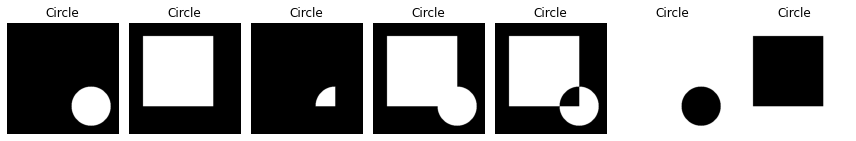

In [12]:
circle = io.imread("../test_images/circle_bw.bmp")
square = io.imread("../test_images/square_bw.bmp")
circle_and_square = np.logical_and(square, circle)
circle_or_square = np.logical_or(square, circle)
circle_xor_square = np.logical_xor(square, circle)
not_circle = np.logical_not(circle)
not_square = np.logical_not(square)
images = np.array([circle, square, circle_and_square, circle_or_square, circle_xor_square, not_circle, not_square])

fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 12), tight_layout=True)

for idx, image in enumerate(images):
    ax[idx].imshow(image, cmap=plt.cm.gray)
    ax[idx].set_title("Circle")
    ax[idx].axis("off");

## Operasi Geometri

In [43]:
def translate_image(image, m, n):
    image_copy = image.copy()
    
    image_translate = np.zeros((image_copy.shape[0], image_copy.shape[1]), dtype=np.uint8)
    x_position = 0
    y_position = 0
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            if (row + m) > image_copy.shape[0] and (column + n) > image_copy.shape[1]:
                image_translate[row, column] = image_copy[image_copy.shape[0] - 1, image_copy.shape[1] - 1]
            elif (row + m) > image_copy.shape[0]:
                image_translate[row, column] = image_copy[image_copy.shape[0] - 1, column + n]
            elif (column + n) > image_copy.shape[1]:
                image_translate[row, column] = image_copy[row + m, image_copy.shape[1] - 1]
#             else:
#                 image_translate[row, column] = image_copy[row + m, column + n]            
    
    return image_translate

bird_gray = io.imread("../test_images/bird_gray.bmp")
bird_gray_translate = translate_image(bird_gray, 10, 10)

IndexError: index 256 is out of bounds for axis 0 with size 256

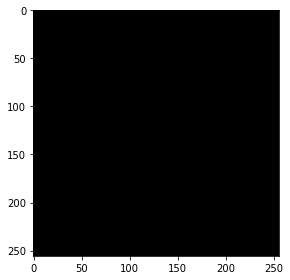

In [41]:
io.imshow(bird_gray_translate)